# ** CPSC8810_HW1-3 Flatness vs Generalization Part2 **

In [1]:
import tensorflow as tf
import cv2
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA

tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## MNIST Dataset Preparation and Visualization

In [2]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True);

train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Training Dataset Size:",train_num)
print("Validation Dataset Size:",valid_num)
print("Testing Dataset Size:",test_num)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

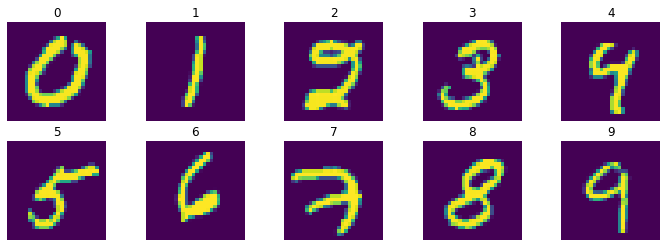

In [3]:
fig, axs = plt.subplots(2,5)
fig.set_size_inches(12,4)
for i in range(10):
    idx = np.where(np.argmax(data.train.labels,1)==i)[0][0]
    axs[int(i/5),i%5].imshow(data.train.images[idx].reshape(28,28))
    axs[int(i/5),i%5].set_title(str(i))
    axs[int(i/5),i%5].axis('off')

### 1.1 Model 1 Architecture

In [4]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h3,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.005);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 1.2 Training Model 1

In [11]:
train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = 64
learning_rate = tf.placeholder(tf.float32)
learn_rate_list = [0.05,0.01,0.005,0.001,0.0005,0.0001]
for i in range(len(lr_list)):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch,learning_rate:learn_rate_list[i]})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
    sens_list1.append(sens)
    msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(lr_list[i], train_loss, train_acc, test_loss, test_acc, sens))

Learn rate: 0.05, Training Loss: 0.0328, Training Accuracy:  98.4%, Test Loss: 0.1358, Test Accuracy:  95.7%, Sensitivity: 0.01638
Learn rate: 0.01, Training Loss: 0.0579, Training Accuracy:  98.4%, Test Loss: 0.09351, Test Accuracy:  97.3%, Sensitivity: 0.01728
Learn rate: 0.005, Training Loss: 0.1004, Training Accuracy:  96.9%, Test Loss: 0.1016, Test Accuracy:  97.1%, Sensitivity: 0.02088
Learn rate: 0.001, Training Loss: 0.01233, Training Accuracy: 100.0%, Test Loss: 0.09811, Test Accuracy:  97.2%, Sensitivity: 0.02428
Learn rate: 0.0005, Training Loss: 0.09695, Training Accuracy:  98.4%, Test Loss: 0.126, Test Accuracy:  96.9%, Sensitivity: 0.03217
Learn rate: 0.0001, Training Loss: 0.006612, Training Accuracy: 100.0%, Test Loss: 0.08914, Test Accuracy:  97.8%, Sensitivity: 0.02718


### 1.3 Model 1 Plot

Text(0.5, 1.0, 'Accuracy vs Learning Rate')

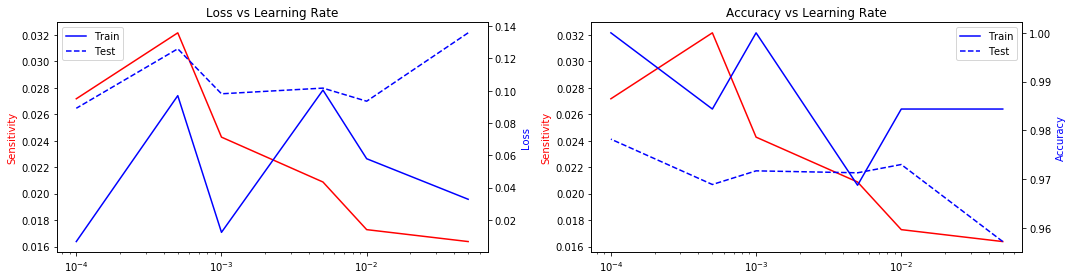

In [15]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list1,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list1,'b')
axs1.plot(lr_list, test_loss_list1,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list1,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs2 = axs[1].twinx()
axs2.plot(learn_rate_list, train_acc_list1,'b')
axs2.plot(learn_rate_list, test_acc_list1,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

___
### 2.1 Model 2 Architecture

In [16]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h3,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.005);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

### 2.2 Model 2 Training

In [22]:
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
    sens_list2.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.00228, Training Accuracy: 100.0%, Test Loss: 0.2463, Test Accuracy:  94.0%, Sensitivity: 0.03628
Batch Size:   16, Training Loss: 0.1632, Training Accuracy: 100.0%, Test Loss: 0.1486, Test Accuracy:  96.2%, Sensitivity: 0.03085
Batch Size:   64, Training Loss: 0.241, Training Accuracy:  93.8%, Test Loss: 0.1149, Test Accuracy:  96.8%, Sensitivity: 0.02842
Batch Size:  256, Training Loss: 0.0502, Training Accuracy:  98.4%, Test Loss: 0.1024, Test Accuracy:  97.2%, Sensitivity: 0.02738
Batch Size:  512, Training Loss: 0.0422, Training Accuracy:  99.0%, Test Loss: 0.1034, Test Accuracy:  97.3%, Sensitivity: 0.02818
Batch Size: 1024, Training Loss: 0.05956, Training Accuracy:  97.9%, Test Loss: 0.105, Test Accuracy:  97.3%, Sensitivity: 0.02878
Batch Size: 2048, Training Loss: 0.04515, Training Accuracy:  98.7%, Test Loss: 0.1052, Test Accuracy:  97.4%, Sensitivity: 0.02899
Batch Size: 4096, Training Loss: 0.04913, Training Accuracy:  98.4%, Test Loss: 0.

In [23]:
sens_list2

[0.036279663,
 0.030851578,
 0.028424514,
 0.027383938,
 0.028184844,
 0.028780257,
 0.028988058,
 0.028969951]

### 2.3 Model 2 Plot

Text(0.5, 1.0, 'Accuracy vs Batch Size')

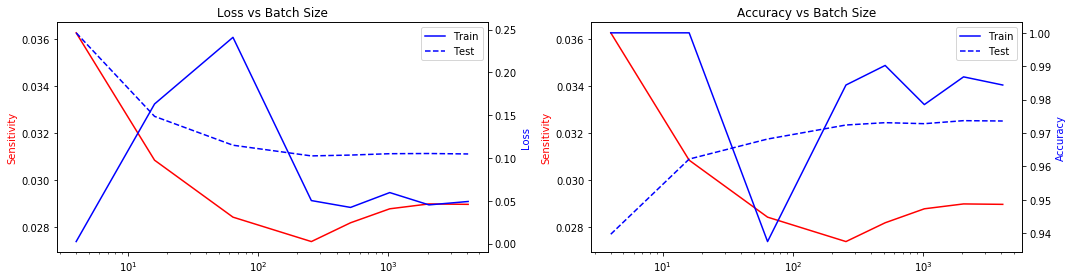

In [24]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list2,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list2,'b')
axs1.plot(BATCH_SIZE, test_loss_list2,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list2,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list2,'b')
axs2.plot(BATCH_SIZE, test_acc_list2,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')

___
### 3.1 Model 3 Architecture

In [25]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.005);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


### 3.2 Model 3 Training

In [37]:
train_loss_list4 = []
train_acc_list4 = []
test_loss_list4 = []
test_acc_list4 = []
sens_list4 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list4.append(train_loss)
    train_acc_list4.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list4.append(test_loss)
    test_acc_list4.append(test_acc)
    sens_list4.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.01517, Training Accuracy: 100.0%, Test Loss: 0.1389, Test Accuracy:  96.4%, Sensitivity: 0.0521
Batch Size:   16, Training Loss: 0.0003803, Training Accuracy: 100.0%, Test Loss: 0.0818, Test Accuracy:  97.9%, Sensitivity: 0.05032
Batch Size:   64, Training Loss: 0.001852, Training Accuracy: 100.0%, Test Loss: 0.04591, Test Accuracy:  98.8%, Sensitivity: 0.0324
Batch Size:  256, Training Loss: 0.002286, Training Accuracy: 100.0%, Test Loss: 0.04412, Test Accuracy:  98.9%, Sensitivity: 0.03394
Batch Size:  512, Training Loss: 0.01171, Training Accuracy:  99.8%, Test Loss: 0.04316, Test Accuracy:  98.9%, Sensitivity: 0.03446
Batch Size: 1024, Training Loss: 0.006358, Training Accuracy:  99.8%, Test Loss: 0.0437, Test Accuracy:  99.0%, Sensitivity: 0.03459
Batch Size: 2048, Training Loss: 0.007136, Training Accuracy:  99.6%, Test Loss: 0.04369, Test Accuracy:  98.9%, Sensitivity: 0.03492
Batch Size: 4096, Training Loss: 0.01021, Training Accuracy:  99.7%,

### 3.3 Model 3 Plot

Text(0.5, 1.0, 'Accuracy vs Learning Rate')

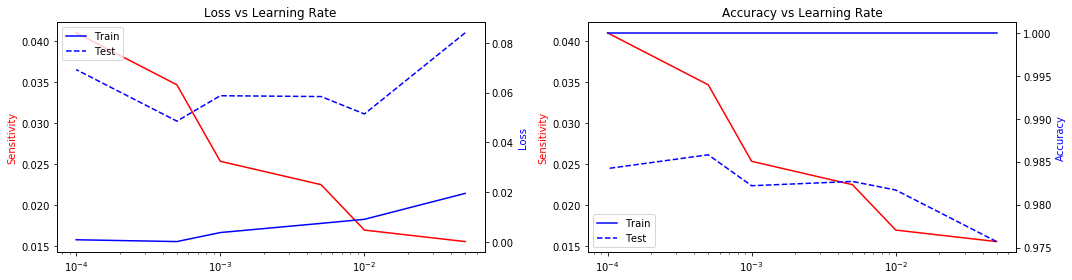

In [32]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr_list,sens_list3,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs1 = axs[0].twinx()
axs1.plot(lr_list, train_loss_list3,'b')
axs1.plot(lr_list, test_loss_list3,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Learning Rate(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Learning Rate')

axs[1].plot(lr_list,sens_list3,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs2 = axs[1].twinx()
axs2.plot(learn_rate_list, train_acc_list3,'b')
axs2.plot(learn_rate_list, test_acc_list3,'b--')
axs2.set_ylabel('Accuracy')
axs2.set_xlabel('Learning Rate')
axs2.yaxis.label.set_color('blue')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Learning Rate')

___
### 4.1 Model 4 Architecture

In [36]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.005);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

### 4.2 Model 4 Training

In [70]:
train_loss_list4 = []
train_acc_list4 = []
test_loss_list4 = []
test_acc_list4 = []
sens_list4 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list4.append(train_loss)
    train_acc_list4.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list4.append(test_loss)
    test_acc_list4.append(test_acc)
    sens_list4.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.0006213, Training Accuracy: 100.0%, Test Loss: 0.3026, Test Accuracy:  92.9%, Sensitivity: 0.04019
Batch Size:   16, Training Loss: 0.1591, Training Accuracy:  93.8%, Test Loss: 0.1578, Test Accuracy:  96.0%, Sensitivity: 0.03133
Batch Size:   64, Training Loss: 0.04539, Training Accuracy:  98.4%, Test Loss: 0.1122, Test Accuracy:  97.0%, Sensitivity: 0.02793
Batch Size:  256, Training Loss: 0.03697, Training Accuracy:  99.2%, Test Loss: 0.1043, Test Accuracy:  97.2%, Sensitivity: 0.02862
Batch Size:  512, Training Loss: 0.06769, Training Accuracy:  97.9%, Test Loss: 0.1051, Test Accuracy:  97.2%, Sensitivity: 0.02977
Batch Size: 1024, Training Loss: 0.04545, Training Accuracy:  98.3%, Test Loss: 0.1049, Test Accuracy:  97.1%, Sensitivity: 0.02986
Batch Size: 2048, Training Loss: 0.04086, Training Accuracy:  98.7%, Test Loss: 0.106, Test Accuracy:  97.1%, Sensitivity: 0.03045
Batch Size: 4096, Training Loss: 0.03973, Training Accuracy:  98.8%, Test Lo

### 4.3 Model 4 Plot

Text(0.5, 1.0, 'Accuracy vs Batch Size')

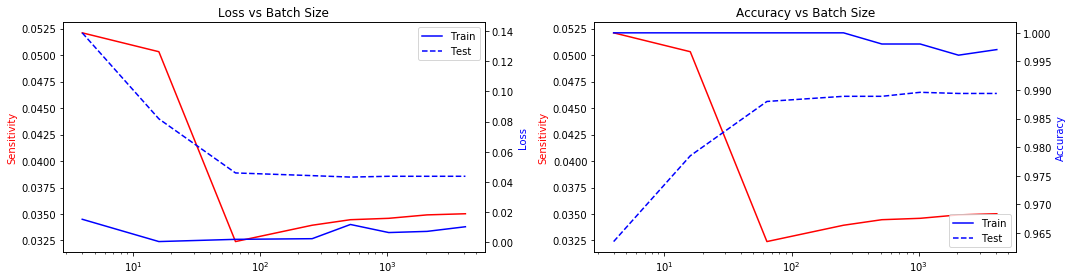

In [38]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list4,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list4,'b')
axs1.plot(BATCH_SIZE, test_loss_list4,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list4,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list4,'b')
axs2.plot(BATCH_SIZE, test_acc_list4,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')

### 5.1 Model 5 Architecture

In [45]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
h4 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h4,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

### 5.2 Model 5 Training

In [46]:
train_loss_list5 = []
train_acc_list5 = []
test_loss_list5 = []
test_acc_list5 = []
sens_list5 = []
session = tf.Session()
session.run(tf.global_variables_initializer())

BATCH_SIZE = [4,16,64,256,512,1024,2048,4096]
for i in range(len(BATCH_SIZE)):
    for j in range(int(data.train.num_examples/BATCH_SIZE[i])):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE[i])
        session.run(train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([loss,acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list5.append(train_loss)
    train_acc_list5.append(train_acc)
    test_loss, test_acc, sens = session.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list5.append(test_loss)
    test_acc_list5.append(test_acc)
    sens_list5.append(sens)
    msg = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
    print(msg.format(BATCH_SIZE[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 5.758e-05, Training Accuracy: 100.0%, Test Loss: 0.1257, Test Accuracy:  96.0%, Sensitivity: 0.01784
Batch Size:   16, Training Loss: 0.008712, Training Accuracy: 100.0%, Test Loss: 0.08382, Test Accuracy:  97.2%, Sensitivity: 0.01655
Batch Size:   64, Training Loss: 0.01114, Training Accuracy: 100.0%, Test Loss: 0.06598, Test Accuracy:  97.9%, Sensitivity: 0.0165
Batch Size:  256, Training Loss: 0.01736, Training Accuracy: 100.0%, Test Loss: 0.0649, Test Accuracy:  98.0%, Sensitivity: 0.01694
Batch Size:  512, Training Loss: 0.0269, Training Accuracy:  99.2%, Test Loss: 0.06421, Test Accuracy:  98.0%, Sensitivity: 0.01715
Batch Size: 1024, Training Loss: 0.02701, Training Accuracy:  99.3%, Test Loss: 0.064, Test Accuracy:  98.0%, Sensitivity: 0.01733
Batch Size: 2048, Training Loss: 0.01417, Training Accuracy:  99.8%, Test Loss: 0.06395, Test Accuracy:  98.0%, Sensitivity: 0.01733
Batch Size: 4096, Training Loss: 0.02903, Training Accuracy:  99.2%, Tes

## Model 5 Plot

Text(0.5, 1.0, 'Accuracy vs Batch Size')

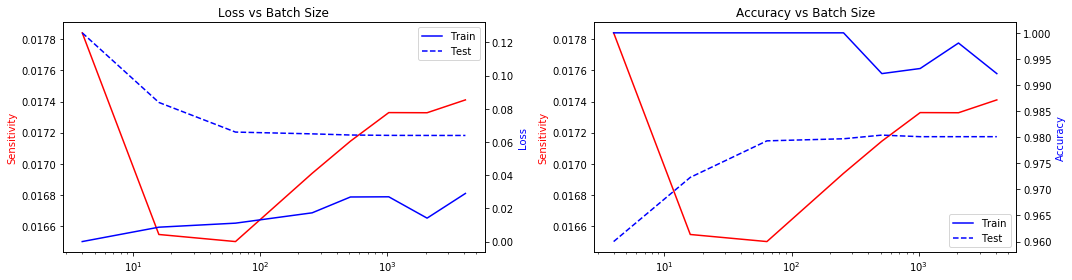

In [47]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(BATCH_SIZE,sens_list5,'r')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity')
axs[0].yaxis.label.set_color('red')
axs1 = axs[0].twinx()
axs1.plot(BATCH_SIZE, train_loss_list5,'b')
axs1.plot(BATCH_SIZE, test_loss_list5,'b--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss')
axs1.yaxis.label.set_color('blue')
axs1.set_xlabel('Batch Size(log scale)')
axs1.legend(['Train','Test'])
axs1.set_title('Loss vs Batch Size')

axs[1].plot(BATCH_SIZE,sens_list5,'r')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity')
axs[1].yaxis.label.set_color('red')
axs2 = axs[1].twinx()
axs2.plot(BATCH_SIZE, train_acc_list5,'b')
axs2.plot(BATCH_SIZE, test_acc_list5,'b--')
axs2.set_ylabel('Accuracy')
axs2.yaxis.label.set_color('blue')
axs2.set_xlabel('Batch Size(log scale)')
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size')